** Kaggle dataset for exploration
https://www.kaggle.com/ludobenistant/hr-analytics

Handling imbalanced datasets 
https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

Approaches:
Techniques modifying the datasets
1) Random undersampling - eliminate a random sample 
    Can discard potentially good data and discard might not be ubiased
2) Random oversampling - replicates lower data set
    Better than random under sampling but may increase overfitting
3) Cluster Based over sampling - each cluster from K-means is over sampled so all clusters of same class have the same size
    Possibility over fitting but overcomes class imbalance
4) Informed oversampling - synthetic minority over sampling (e.g. SMOTE) - subset of minority set is taken and then new items created
    Avoids over-fitting but not effective for high dimensions. SMOTE does not take into account distribution of minority class nor noise 
5) Modified synthetic minority oversampling technique (MSMOTE) - 

Algorithmic Ensemble Techniques - improve performance of single classifiers
1) Bagging - Bootstrap aggregation - Generating 'n' different bootstrap training samples with replacement. Train samples and aggregate predictions at the end.
    Bad classifiers further degrade performance but overcomes overfitting, reduces variance. Outperforms boosting in noisy environments
    (http://scikit-learn.org/stable/modules/ensemble.html)
    Bagging methods come in many flavours but mostly differ from each other by the way they draw random subsets of the training set:
    When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting [B1999].
    When samples are drawn with replacement, then the method is known as Bagging [B1996].
    When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces [H1998].
    Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches [LG2012].
    
2) Boosting - combine weak learners to create stronger learner. Classifier said to be weak when small changes induce big changes in the model. Next iteration places more weight on those cases incorrectly classified in the last round.

3) Adaptive Boosting - Ada Boost - Each classifier serially trained to correctly classify all incorrectly classified previously. Requires user to specify the set of weak learners.

For a learned classifier to make strong predictions:
    Rules should be simple
    Classifier trained on sufficient number of samples
    Low training error
    Sensitive to noisy data and outliers. Simple to implemen, good generalization and not prone to overfitting
    
4) Gradient Tree Boosting
Decision Trees are used as weak learners  in Gradient Boosting. Builds first learner. Calculates loss and uses loss to build an improved learner.
    Harder to fit than Random forests. Three parameters Shrinkage, depth of tree, number of trees. Proper training needed for a good fit.
    
5) XGBoost - Extreme Gradient Boosting - 10 times faster than gradient boosting. Implements parallel processing. Highly flexible.
http://xgboost.readthedocs.io/en/latest/model.html
Tree Ensemble
The tree ensemble model is a set of classification and regression trees (CART).
A CART is a bit different from decision trees, where the leaf only contains decision values. In CART, a real score is associated with 
each of the leaves, which gives us richer interpretations that go beyond classification. 
Random forests and boosted trees are not different in terms of model, the difference is how we train them.
Additive training - use an additive strategy: fix what we have learned, and add one new tree at a time.
Can optimize every loss function, including logistic regression and weighted logistic regression.
https://github.com/dmlc/xgboost/tree/master/demo/guide-python

http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/
Single decision/regression tree – it fails to include predictive power from multiple, overlapping regions of the feature space

In [47]:
# Standard library imports
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

from scipy import stats as st
import seaborn as sns

from sklearn.linear_model import LinearRegression
import sklearn.linear_model as linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [48]:
# load data
alldata = pd.read_csv('C:/Users/Admin/Documents/LocalDatasets/SampleData_IMC.csv')

# Get quantative and qualitative variables
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [49]:
alldata.head()

,MSISDN,AON,Churn Flag,Avg_Inactive_Days in last 1 month,Current_Balance in INR,Data Days Latest week,Calling Days Latestweek,Recharge Amount Latest Week,Avg_OG_Local_Offnet_Cnt,Avg_OG_Local_Offnet_Cnt.1,Roaming User,Avergae Complaints Count Last 4 weeks
0,7610120456,6-12 months,1.0,4.18,20.0,1.0,1.0,44.0,13.0,5.0,0.0,3.0
1,7611120467,12-18 months,0.0,16.00,18.0,2.0,3.0,18.0,7.0,14.0,1.0,1.0
2,9711120467,>18 months,0.0,18.00,8.0,4.0,2.0,98.0,12.0,12.0,0.0,0.0
3,9830022336,3-6 months,0.0,18.00,8.0,3.0,2.0,86.0,3.0,12.0,0.0,2.0
4,9713246555,>18 months,0.0,6.00,44.0,6.0,3.0,36.0,11.0,4.0,0.0,2.0


In [50]:
alldata.shape
print(quantitative)
print(qualitative)

['Churn Flag', 'Avg_Inactive_Days in last 1 month', 'Current_Balance in INR', 'Data Days Latest week', 'Calling Days Latestweek', 'Recharge Amount Latest Week', 'Avg_OG_Local_Offnet_Cnt', 'Avg_OG_Local_Offnet_Cnt.1', 'Roaming User', 'Avergae Complaints Count Last 4 weeks', 'AON_12-18 months', 'AON_3-6 months', 'AON_6-12 months', 'AON_>18 months']
[]


In [51]:
# This is the imbalance in the data
alldata['Churn Flag'].fillna(-1, inplace=True)
alldata['Churn Flag'].value_counts()

 0.0    193
-1.0     15
 1.0      3
Name: Churn Flag, dtype: int64

In [52]:
# Remove missing values
alldata = alldata[alldata['Churn Flag'] != -1]
alldata['Churn Flag'].value_counts()

0.0    193
1.0      3
Name: Churn Flag, dtype: int64

In [53]:
# Drop MSISDN column
del alldata['MSISDN']

# Create dummy variable for AON (Age on Network)
alldata = pd.get_dummies(alldata)

In [147]:
#ratio = round(len(alldata) * 0.20)

#sampledata = alldata.sample(ratio)

#alldatawithsample = pd.concat([alldata,sampledata])


# print(alldata.iloc[0:,1:].shape)
# npSeries = pd.Series(alldata.iloc[0:,0:1])   # .ravel()
# npSeries
# print (alldata.iloc[0:,0:1])
# print(alldatawithsample[3:3][0:].shape)

msk = np.random.rand(len(alldata)) < 0.8

train = alldata[msk]
test = alldata[~msk]

test_y = test.iloc[0:,0:1]
test_x = test.iloc[0:,1:]

print (test_y.shape)
print (test_x.shape)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

(38, 1)
(38, 13)


In [149]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# npSeries = pd.Series(alldata.iloc[0:,1:1])   # .ravel()
test_y = test.iloc[0:,0:1]
test_x = test.iloc[0:,1:]

bagging = BaggingClassifier()
bagging.fit(test_x,test_y)
bagging_output = bagging.predict(test_x)


[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


C:\WinPython\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier

# npSeries = pd.Series(alldata.iloc[0:,1:1])   # .ravel()

adaboost = AdaBoostClassifier()
adaboost.fit(train.iloc[0:,1:],train.iloc[0:,0:1])

adaboost.score(test.iloc[0:,1:],test.iloc[0:,0:1])

C:\WinPython\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboost = GradientBoostingClassifier()
gradientboost.fit(train.iloc[0:,1:],train.iloc[0:,0:1])

gradientboost.score(test.iloc[0:,1:],test.iloc[0:,0:1])

C:\WinPython\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.97727272727272729

In [4]:
from xgboost import XGBClassifier

# fit model no training data
xgboost = XGBClassifier()
xgboost.fit(train.iloc[0:,1:],train.iloc[0:,0:1])



C:\WinPython\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


C:\WinPython\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\sklearn\metrics\ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


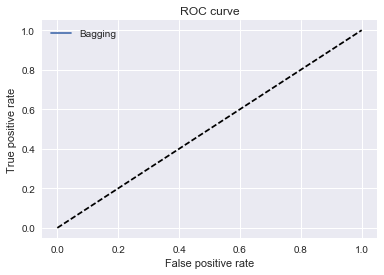

In [152]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test.iloc[0:,0:1], bagging_output, pos_label=2)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Bagging')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
